<a href="https://colab.research.google.com/github/yashodhicy/Scientific-python-programs/blob/staging/relativeHumidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understand the dataset by visualizing data

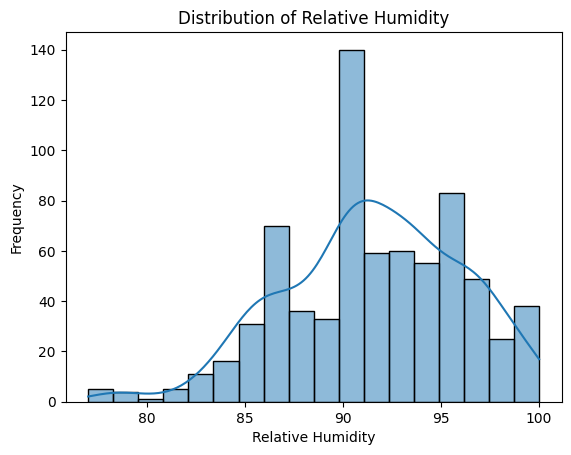

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/weather_2022-12.csv')

#get only RH avg values
rh_data = data[data['ParameterName'] == 'RH_PT1H_AVG'].copy()

#drop NAN values
rh_data.dropna(subset=['ParameterValue'], inplace=True)

sns.histplot(rh_data['ParameterValue'], kde=True)
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.show()

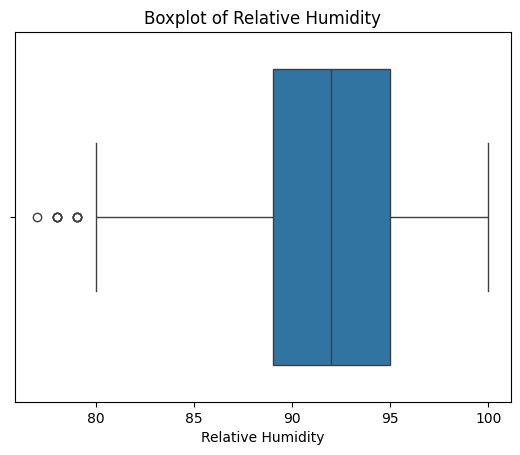

In [53]:
# Check for outliers using boxplot
sns.boxplot(x=rh_data['ParameterValue'])
plt.title('Boxplot of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.show()

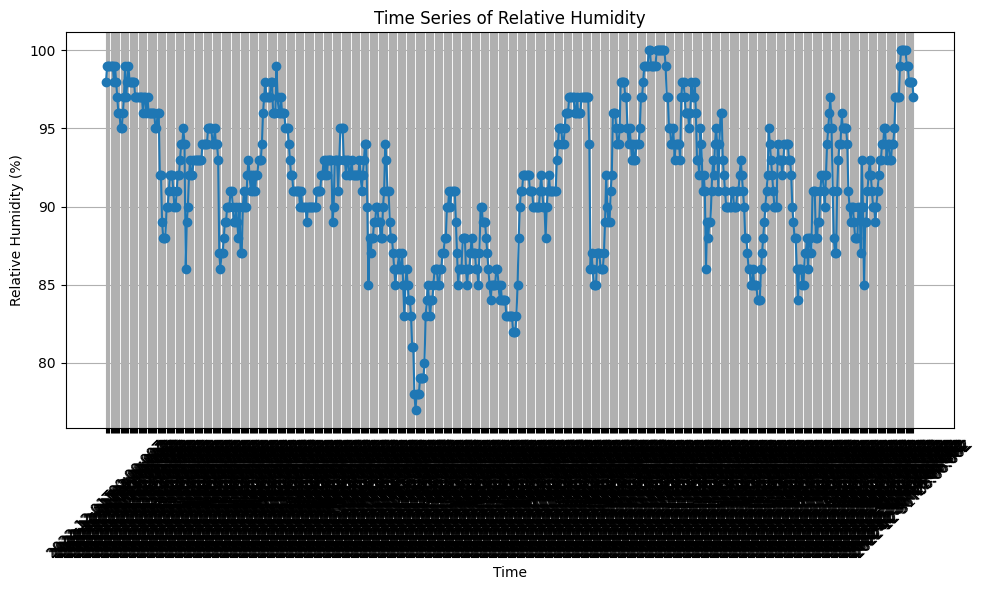

In [59]:
# Visual Inspection
plt.figure(figsize=(10, 6))
plt.plot(rh_data['Time'], rh_data['ParameterValue'], marker='o', linestyle='-')
plt.title('Time Series of Relative Humidity')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Get the average relative humidity with outliers since the outliers seem to be a natural occurrence.


In [54]:
average_relative_humidity = rh_data['ParameterValue'].mean()
print("Average Relative Humidity:", average_relative_humidity)

Average Relative Humidity: 91.53120665742026



## Calculate the average relative humidity without outliers to assess the sensitivity of the outliers.

In [51]:
threshold = 80
cleaned_data = rh_data[rh_data['ParameterValue'] >= threshold]

# Calculate the average relative humidity using the cleaned dataset
average_relative_humidity_cleaned = cleaned_data['ParameterValue'].mean()

print("Average Relative Humidity (after removing outliers):", average_relative_humidity_cleaned)

Average Relative Humidity (after removing outliers): 91.69803370786516


**It appears that the average relative humidity after removing outliers is slightly higher than the original average relative humidity. This suggests that the outliers were exerting a downward influence on the average, and removing them resulted in a slightly higher average.

The difference between the two averages is relatively small, but it's important to consider whether removing the outliers is justified based on the characteristics of this data and the context of the analysis. Additionally, we may want to investigate further to understand why these outliers occurred and whether they represent genuine anomalies or errors in the data.**




### Further correlation analysis to understand the dependencies for future reference.

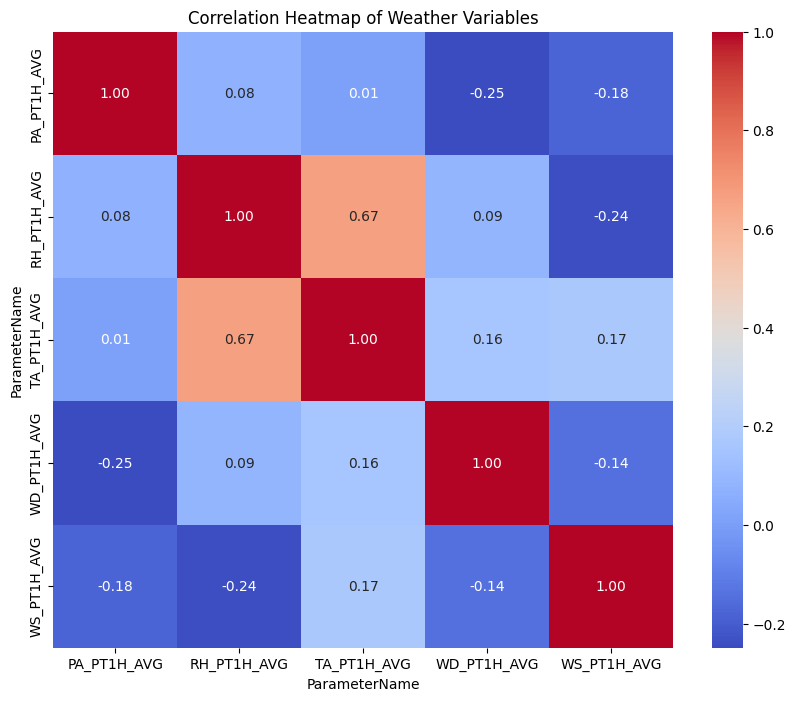

In [55]:
data['ParameterValue'] = pd.to_numeric(data['ParameterValue'], errors='coerce')


weather_variables = ['TA_PT1H_AVG', 'RH_PT1H_AVG', 'WS_PT1H_AVG', 'WD_PT1H_AVG', 'PA_PT1H_AVG']
weather_data = data[data['ParameterName'].isin(weather_variables)]

weather_data_pivot = weather_data.pivot(index='Time', columns='ParameterName', values='ParameterValue')


correlation_matrix = weather_data_pivot.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

